In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import allplayers_wrangle as wr
import explore as ex
import model as md

# plotting defaults
plt.rc('figure', figsize=(16, 8))
plt.style.use('dark_background')
plt.rc('font', size=16)

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, SelectKBest, f_regression

import warnings
warnings.filterwarnings("ignore")

# Making sure that eniter numerical values show for reading purposes
pd.options.display.float_format = '{:.2f}'.format

# NBA Salary Prediction

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Goals
- Using both basic stats and advanced stats can I predict an NBA player's salary as well as what which stat(s) are the biggest driver's of an NBA players Salary.

# Project Description
- This project runs through the entire Data Science Pipeline using regression models to attmept to predict NBA PLayers' salaries.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Project Planning

- Create README.md with data dictionary, project goals, and come up with initial hypotheses.
- Acquire data from the Basketball Reference website, turn into a CSV and create a function to automate this process. 
- Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process. 
- Store the acquisition and preparation functions in a wrangle.py module function, and prepare data in Final Report Notebook by importing and using the function.
- Clearly define at least two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- Establish a baseline accuracy and document well.
- Train at least 3 different regression models.
- Evaluate models on train and validate datasets.
- Choose the model that performs the best and evaluate that single model on the test dataset.
- Document conclusions, takeaways, and next steps in the Final Report Notebook.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Wrangling/Train, Validate, Test

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

In [2]:
# Combines basic, advanced stats and nba player's salaries. All stats were pulled from basketball reference
ss = wr.prepare_ss()
ss

,age,gp,gs,mp,fg,fga,2p,2pa,3p,3pa,...,usg_pct,above_avg_scorer,above_avg_3ball,above_avg_ft,above_avg_ts,above_avg_usg_pct,salary,C,F,G
Player,,,,,,,,,,,,,,,,,,,,,
Aaron Brooks,33.00,32.00,1.00,5.90,0.90,2.20,0.50,1.20,0.30,1.00,...,19.90,0.00,0.00,0.00,0.00,1.00,2116955.00,0.00,0.00,1.00
Aaron Gordon,22.00,58.00,57.00,32.90,6.50,14.90,4.50,9.00,2.00,5.90,...,24.70,1.00,0.00,0.00,0.00,1.00,5504420.00,0.00,1.00,0.00
Abdel Nader,24.00,48.00,1.00,10.90,1.00,3.10,0.60,1.80,0.50,1.40,...,17.10,0.00,0.00,0.00,0.00,0.00,1167333.00,0.00,1.00,0.00
Al Horford,31.00,72.00,72.00,31.60,5.10,10.50,3.80,7.30,1.30,3.10,...,18.40,0.00,1.00,1.00,1.00,0.00,27734405.00,1.00,0.00,0.00
Al Jefferson,33.00,36.00,1.00,13.40,3.10,5.80,3.10,5.70,0.00,0.10,...,22.50,0.00,0.00,1.00,1.00,1.00,9769821.00,1.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zach Collins,20.00,66.00,1.00,15.80,1.70,4.40,1.20,2.70,0.50,1.70,...,15.40,0.00,0.00,0.00,0.00,0.00,3057240.00,1.00,0.00,0.00
Zach LaVine,22.00,24.00,24.00,27.30,5.70,14.80,3.90,9.70,1.80,5.10,...,29.50,1.00,0.00,1.00,0.00,1.00,3202217.00,0.00,0.00,1.00
Zach Randolph,36.00,59.00,57.00,25.60,6.10,12.90,5.30,10.40,0.90,2.50,...,27.60,0.00,0.00,1.00,0.00,1.00,12307692.00,0.00,1.00,0.00


In [3]:
# Splitting dataset into three sub datasets to prevent data leakage.
train, val, test = wr.wrangle_ss()
train.shape, val.shape, test.shape

((232, 55), (100, 55), (83, 55))

##  Wrangling Takeaways
- Using data from basketball reference we pulled in players' statistical and salary data from the 2017-2018 NBA Season. 
- Following the Data Acquisition the following preparation work was done to the acquired data:
    - Removed any players who did have complete statistical lines or salaries from the dataset.
    - Created features that compare and find players who are above average in a few commonly used stats.
    - Following data prepartion, we were left with a dataframe consisting of 415 observations and 55 statistical columns.
    - Split data into 3 datasets, train, validate and test

# Intial Questions
- Which scoring aspect affects a players salary the most?
- Does a players usage percentage affect their salary?
- Does a players VORP (Value Over Replacement Player) affect their salary?
- Does position affect a players salary?

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Data Exploration

-Let's explore the target variable's distribution (Salary)


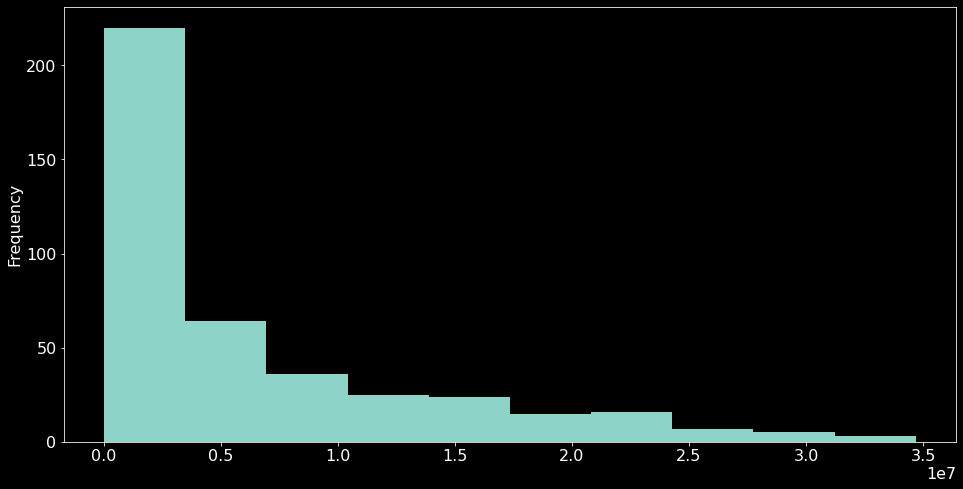

In [4]:
ss.salary.plot.hist()
plt.show()

## 1. Which scoring aspect affects a players salary the most?

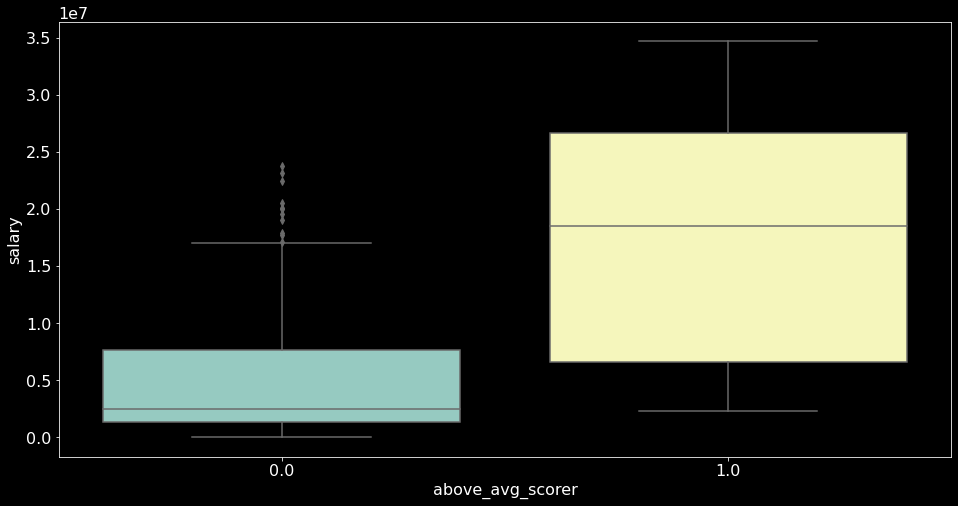

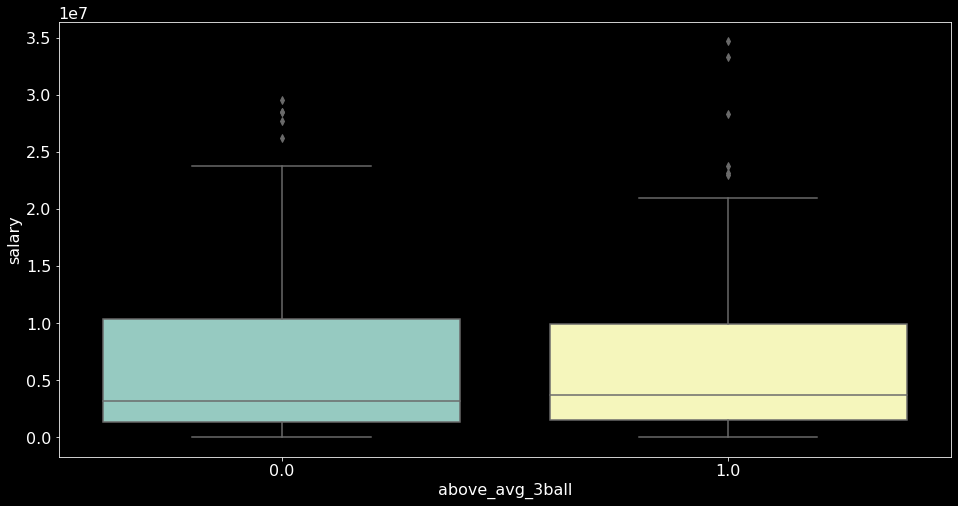

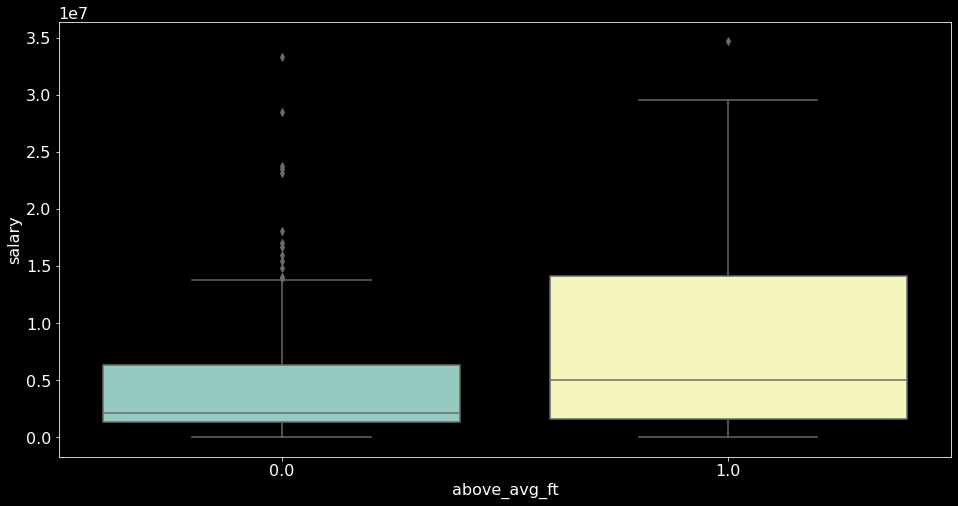

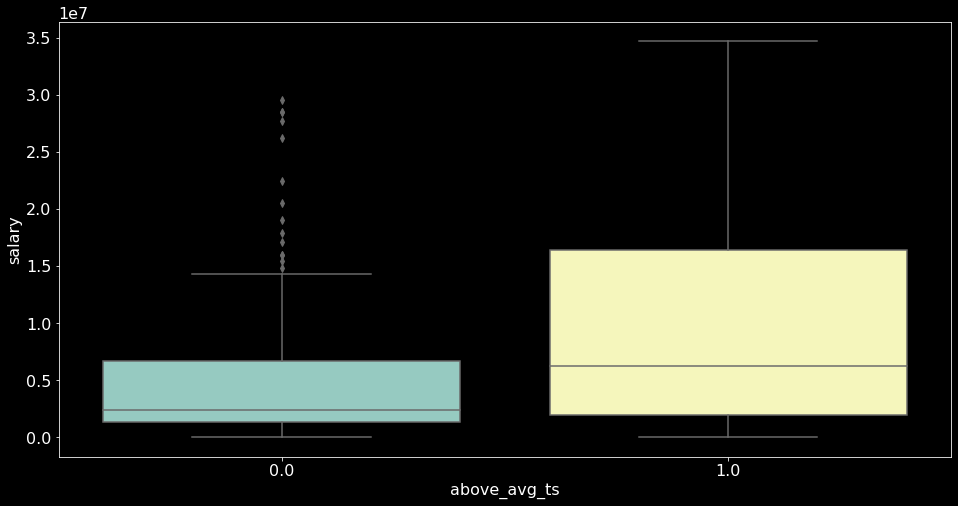

In [5]:
# Function will return a graph showing salary difference between players above and below selected stats
ex.fe_plot()

### Takeaways
- It seems that all of the feature engineered statistics, being above the league average in a scoring metric will land you a higher salary than those who do fall below league average.

- The biggest difference in salary is between a player who is above league average in scoring and players who are not above league average.

- This follows common logic as teams will see players are both more efficient and score at a higher rate as more valuable than those who need more shots to score or do not score as efficiently.

#### Scoring statistical testing
(H_0): Players with an above avg TS% and PPG DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

In [6]:
# Statistical test that sees if players with both an above average True Shooting Percentage and Points Per Game make more than players not above average in TS and PPG
ex.fe_test()

Reject the Null Hypothesis.
        
    Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 2. Does a players usage percentage affect their salary?

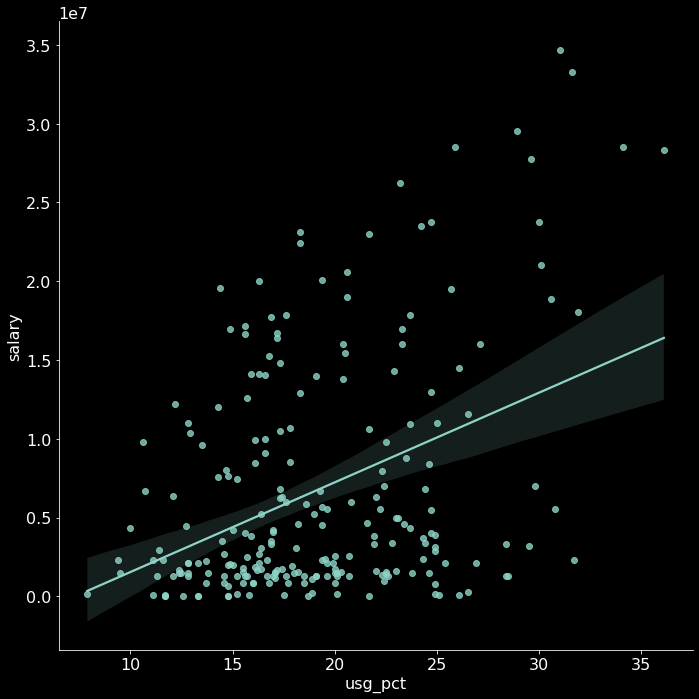

In [7]:
# Returns a graph that shows how a players Usage Percentage relates to their salary
ex.usg_pt_plot()

## Takeaways
- The reason for asking this question was to see if players who handled the ball more got paid more.

- It seems that be that there is some relationship between usgae percentage and salary.

- Perhaps teams see that if a player is to be running the offense more or handling the ball more they should be paid more to do so.

#### USG % statistical testing
(H_0): Players with an above avg USG % DO NOT earn a significantly different salary than then the rest of the league.

(H_a): Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

In [8]:
# Returns statistical test that see's if a players usage percentage affects their salary.
ex.usg_pct_test()

Reject the Null Hypothesis.
        
    Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 3. Does a players VORP (Value Over Replacement Player) affect their salary?

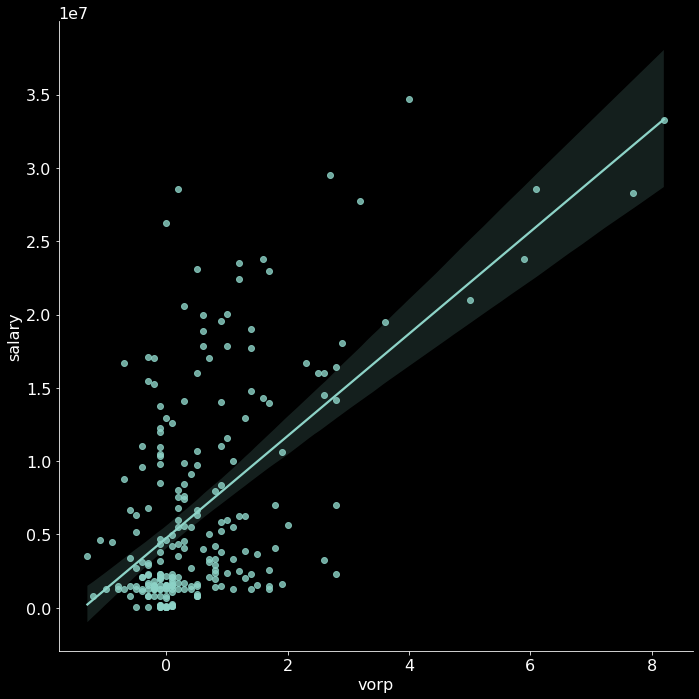

In [9]:
# Returns a graph showing a players VORP in relation to their salary.
ex.vorp_plot()

### Takeaways
- With VORP being a stat the compares how a player affect's it's teams play it would make sense to think that players with higher VORP's also get paid more.
- Visually we can that that is the case, let's see if statistical testing can help prove that.

### VORP statistical testing
H_0: Players with an above avg VORP DO NOT earn a significantly different salary than then the rest of the league.

H_a: Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.

In [10]:
# Returns statistical test that sees if a players VORP affects their salary.
ex.vorp_test()

Reject the Null Hypothesis.
        
    Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.


<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## 4. Does position affect a players salary?

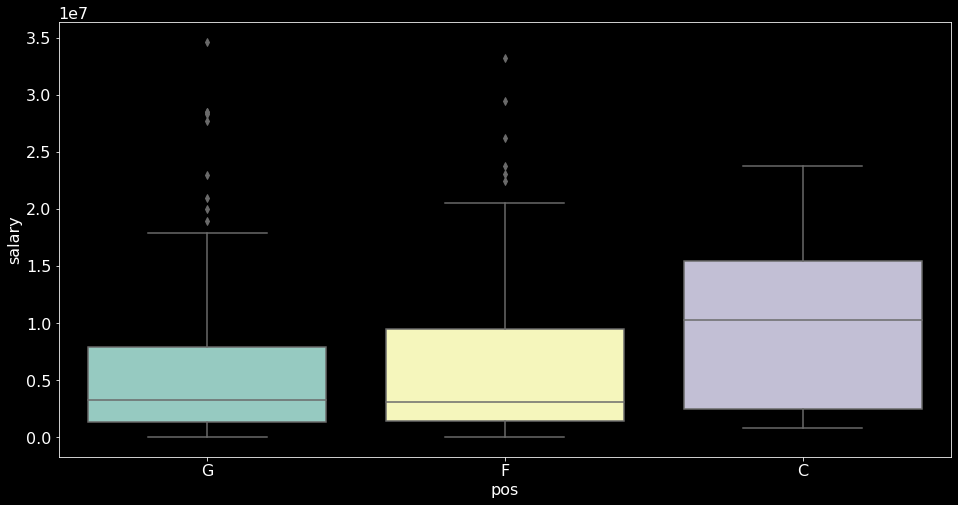

In [11]:
# Returns a graph that shows a players position in relatino to salary.
ex.pos_plot()

### Takeaways
- Visually we see that players who are centers are paid more than those who are guards or wings.
- This goes against the common arguement that guards are more valuable in today's game.
- Let's see if statistical testing shows that or not.

#### Position statistical testing
(H_0): Centers DO NOT make more than the league average.

(H_a): Centers DO make more than the league average.

In [12]:
# Returns statistical test that sees if on average centers make more than the nba player on average.
ex.pos_test()

Reject the Null Hypothesis.
        
    Centers DO make more than the league average.


## Exploration Summary

- Players with an above avg TS% and PPG DO earn a significantly different salary than then the rest of the league.

- Players with an above avg USG % DO earn a significantly different salary than then the rest of the league.

- Players with an above avg VORP DO earn a significantly different salary than then the rest of the league.

- We saw that a position that a player pays does have a impact on their salary.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

## Modeling 



### Going to use features I investigated along with age and winshare, as domain knowledges 
### suggests that the age of a player as well as a players contribution to winning affect their salary
### As well as using common statistics tha many causal fans find useful in player comparison

### Features used are as follows:
- Points per game, Freethrow percentage, Usage percentage, VORP,True Shooting Percentage, Age, Winshares, Assists per game, Steals per game, Blocks per game, Turnovers per game, and Personal Fouls pergame

In [13]:
# Runs several models for both the train and validate samples and returns the results in a clean dataframe.
md.model_eval()

,model,rmse_train,r2_train,rmse_validate,r2_validate
0,baseline_mean,7519504.17,0.00,6809157.06,0.00
1,"LarsLasso, alpha 3",5064387.23,0.55,4826368.71,0.51
2,Tweedie Regressor,4893225.46,0.58,4644594.78,0.55
3,"Polynomial Features, D2",3525401.07,0.78,5146713.31,0.43
4,"Polynomial Features, D3",318403.96,1.00,95616549760232.66,-202120333434623.62


### Will be using the Tweedie Regressor model as it is the most consistent when going from seen to unseen data.

In [14]:
# Using our best performing model, returna dataframe that shows how the model 
# performed on all 3 samples of data as well as how the baseline model compares.
md.final_model_test()

,rmse,r2
baseline,7519504.17,0.58
train,4893225.46,0.58
validate,4644594.78,0.55
test,5215714.08,0.54


## Modeling takeaways

- The Tweedie Regressor model did the most consistent out of all the models tested and did not overfit. 

- With the model for all three data sets roughly falling 4-5 million dollars off of a players actual salary.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>

# Conclusions, and Next Steps

- Although this number seems far off without context it must be remembered that there are factors at play that simply cannot be measured by statistics alone.

- Factors such as player popularity in the team's fanbase, a player's potential to improve, the market value of a player with similar skillsets, whether a player is willing to take a pay cut for a better chance at winning, personal achievements by a player such as MVP, ALL-NBA, ALL-DEFENSE, All-Star selections, whether a player has been injured, etc.

- For the next steps after this project I would like to incorporate a player's personal achievements into consideration and see how much those achievements affect players' salaries.

- As well as pulling in shot chart data that shows a player's shot distribution, seeing as how certain players may perform best in certain roles, such as a spot-up shooter, pick and roll maestro or rollman, etc.

- With the NBA being an everchanging league, certain players will fill roles that are seen as better contributors to winning, and thus salaries will continue to fluctuate for players outside or the elite of the elite players.

- In conclusion, I believe my models provided a good starting point for giving a player an initial offer based solely on statistics alone.

<hr style="border-top: 10px groove blue; margin-top: 1px; margin-bottom: 1px"></hr>